In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
filename = 'NammaMetro_Ridership_Dataset.csv'
df = pd.read_csv(filename)

# Optionally fix anomalies for QR tickets
# df.loc[df['Record Date'] == '2024-12-06', 'Total QR'] = 219194  # Example fix

df['Total Riders'] = df[['Total Smart Cards', 
                         'Total Tokens', 
                         'Total QR', 
                         'Total NCMC', 
                         'Group Ticket']].sum(axis=1)

df['Record Date'] = pd.to_datetime(df['Record Date'], format='%d-%m-%Y')
df['Day of Week'] = df['Record Date'].dt.day_name()

df['Total Riders'] = df[['Total Smart Cards', 
                         'Total Tokens', 
                         'Total QR', 
                         'Total NCMC', 
                         'Group Ticket']].sum(axis=1)

df['Record Date'] = pd.to_datetime(df['Record Date'], format='%d-%m-%Y')
df['Day of Week'] = df['Record Date'].dt.day_name()

In [3]:
exclude_dates = ['2025-02-26', '2025-03-09', '2025-03-14', '2025-03-22', '2025-03-30', 
                 '2025-03-31', '2025-04-10', '2025-04-14', '2025-04-18', '2025-04-30']
exclude_dates = pd.to_datetime(exclude_dates)
df = df[~df['Record Date'].isin(exclude_dates)]

df = df[(df['Record Date'] >= '2025-02-10') & (~df['Day of Week'].isin(['Saturday', 'Sunday']))]

df = df[['Total Smart Cards', 'Total Tokens', 'Total NCMC', 'Total QR', 'Group Ticket', 'Total Riders']]

df_stats = df.describe().astype(int)
display(df_stats)

,Total Smart Cards,Total Tokens,Total NCMC,Total QR,Group Ticket,Total Riders
count,43,43,43,43,43,43
mean,422378,192612,16457,165174,283,796906
std,21875,15457,4588,9670,258,27658
min,349778,168756,9009,148163,0,740148
25%,412963,178639,11397,156682,146,779368
50%,420869,191193,17494,165030,237,796992
75%,437576,203953,20260,174403,348,814464
max,458456,235448,23611,180897,1625,873279


In [10]:
claim_date = "2025-04-17"
claim = 908153

mean = df_stats.loc['mean', 'Total Riders']
std = df_stats.loc['std', 'Total Riders']

z_score = (claim - mean) / std
p_value = stats.norm.sf(z_score)

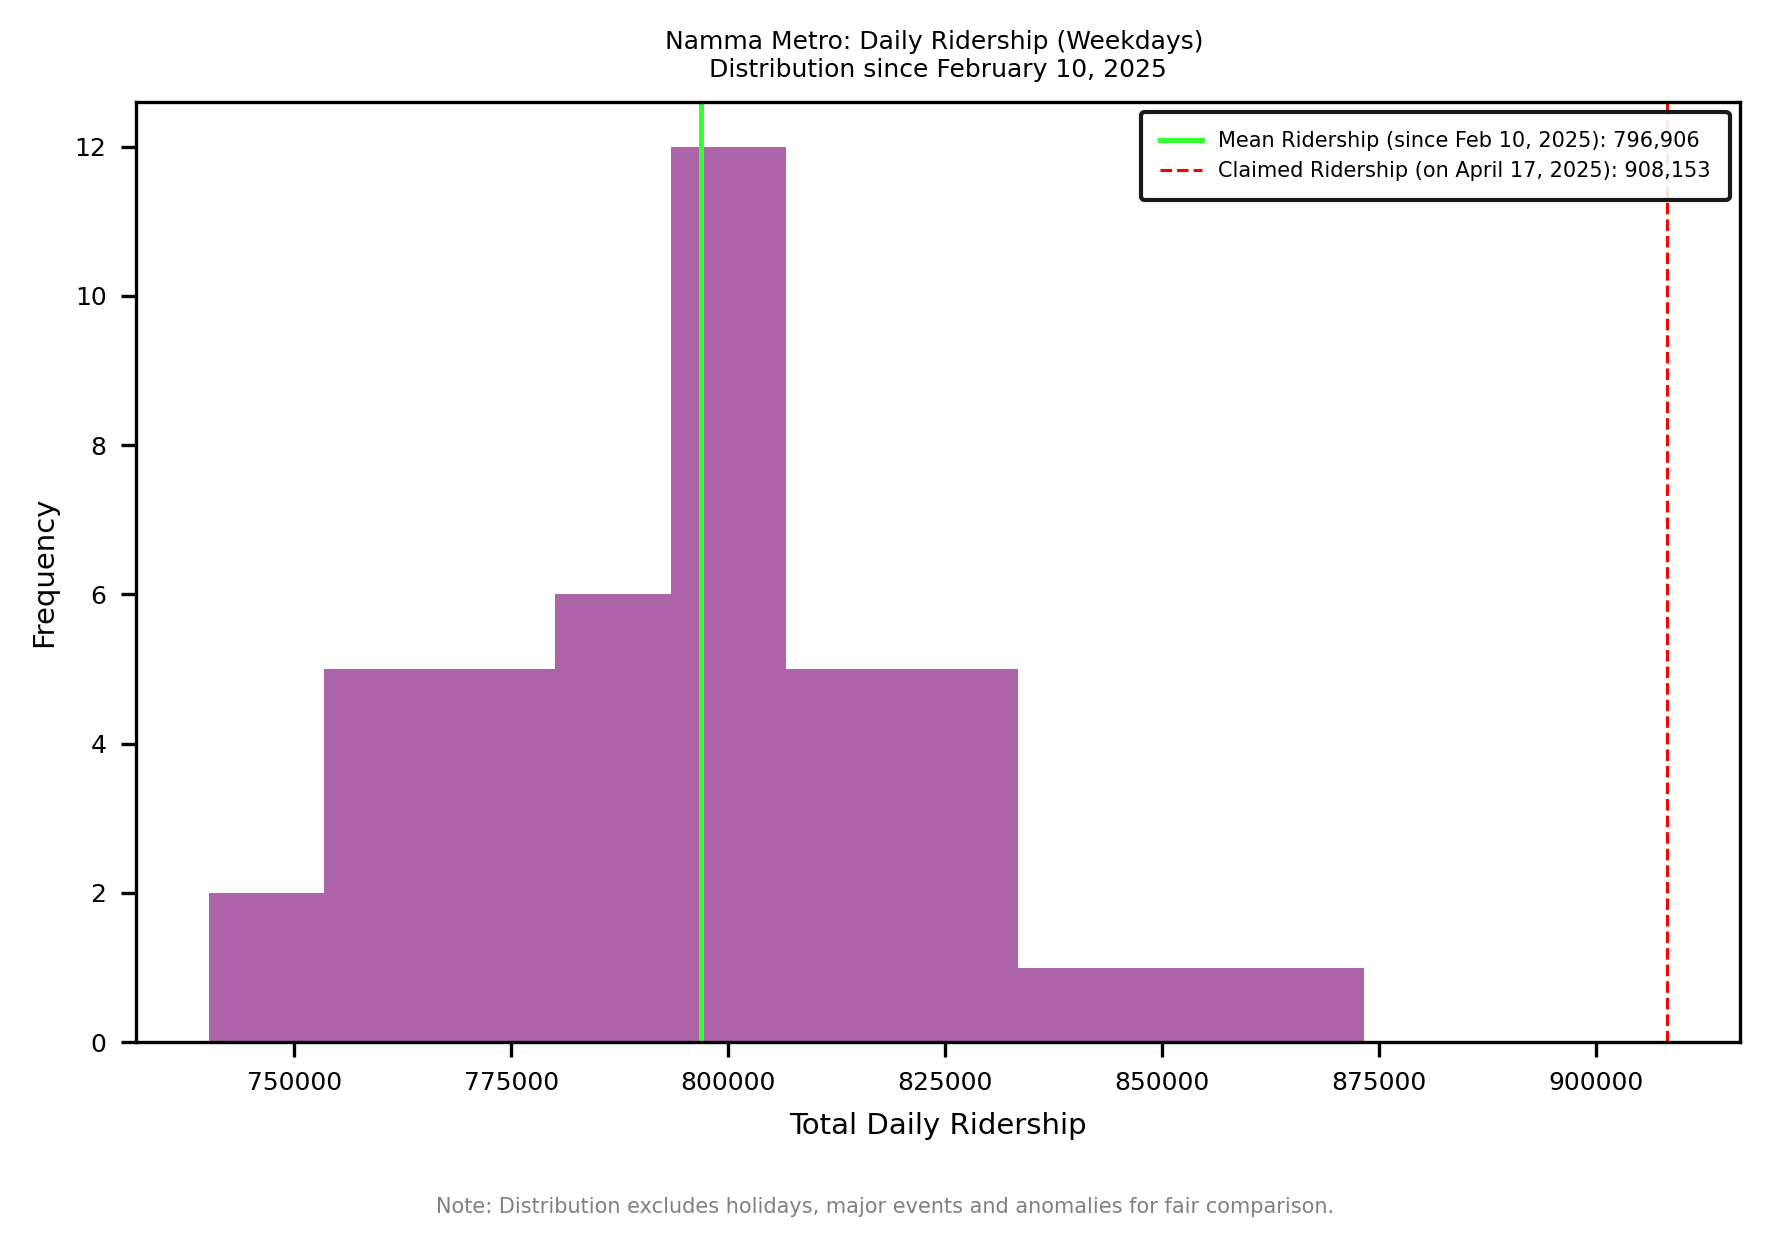

In [11]:
plt.figure(figsize=(6, 4), dpi=300)

# Mean and claimed lines
plt.axvline(mean, color='#33ff33', linestyle='-', label=f'Mean Ridership (since Feb 10, 2025): {mean:,.0f}', linewidth=1.2)
plt.axvline(claim, color='red', linestyle='--', label=f'Claimed Ridership (on April 17, 2025): {claim:,.0f}', linewidth=0.75)

plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.xlabel('Total Daily Ridership', fontsize=7)
plt.ylabel('Frequency', fontsize=7)
plt.title('Namma Metro: Daily Ridership (Weekdays) \nDistribution since February 10, 2025', fontsize=6)
plt.legend(fontsize=5, loc='upper right', borderpad=0.9, edgecolor='black', framealpha=0.9, facecolor='white')
plt.figtext(0.5, -0.01,
            "Note: Distribution excludes holidays, major events and anomalies for fair comparison.",
            wrap=True, ha='center', va='top', fontsize=5, color='gray')
plt.hist(df['Total Riders'], bins=10, alpha=0.7, color='#8B2183')
plt.tight_layout()
plt.show()

In [6]:
alpha = 0.01    # 99% confidence threshold

print(f"{claim_date}:")
print(f"  Claimed: {claim:,}")
print(f"  𝜇 (mean): {mean:,.0f}, σ (std dev): {std:,.0f}")
print(f"  z-score: {z_score:.2f}")
print(f"  p-value: {p_value:.4f}")
print(f"  % above mean: {100 * (claim - mean) / mean:.2f}% \n")

if p_value < alpha:
    verdict = (
        "🚨 Verdict: Statistically Implausible 🚨"
#        f"With a p-value of {p_value:.4f}, we reject the null hypothesis at the 99% confidence level.\n"
#        "This means there is less than a 1% chance of observing such a high ridership by random variation alone.\n"
#        "The claimed number is extremely unlikely based on recent typical ridership."
    )
else:
    verdict = (
        "✅ Verdict: Plausible \n\n"
        f"The claim is within the range of normal variation at the 99% confidence level."
    )

print(verdict, end='')

2025-04-17:
  Claimed: 908,153
  𝜇 (mean): 796,906, σ (std dev): 27,658
  z-score: 4.02
  p-value: 0.0000
  % above mean: 13.96% 

🚨 Verdict: Statistically Implausible 🚨

In [7]:

from IPython.display import Markdown

formula_md = f"""
```math
\\Large Z = \\frac{{(\\text{{Claimed Value}} - \\text{{Period Mean}})}}{{\\text{{Period Std Deviation}}}}
```
\\
\\
```math
\large (\\text{{Claimed}}: {claim:,}): \\
[ Z = \\frac{{{claim:,} - {mean:,}}}{{{std:,}}} \\approx {z_score:.2f}]
```
\\
\\
| Date | Claimed | Mean | Std Dev | Z-score | Verdict |
|------|---------|------|---------|---------|---------|
| {claim_date} | {claim} | {mean} | {std} | {z_score:.2f} | {verdict} | 

\\
\\
"""

Markdown(formula_md)


```math
\Large Z = \frac{(\text{Claimed Value} - \text{Period Mean})}{\text{Period Std Deviation}}
```
\
\
```math
\large (\text{Claimed}: 908,153): \
[ Z = \frac{908,153 - 796,906}{27,658} \approx 4.02]
```
\
\
| Date | Claimed | Mean | Std Dev | Z-score | Verdict |
|------|---------|------|---------|---------|---------|
| 2025-04-17 | 908153 | 796906 | 27658 | 4.02 | 🚨 Verdict: Statistically Implausible 🚨 | 

\
\
